In [ ]:
import numpy as np
import sdypy as sd
from sdypy.view import Plotter3D
import pickle
import pyvista as pv
import matplotlib.pyplot as plt
import meshio

import warnings
warnings.filterwarnings('ignore')

freq, frf = pickle.load(open('data/frf.pkl', 'rb'))

[Klemen Zaletelj](http://www.ladisk.si/~zaletelj), [Domen Gorjup](http://www.ladisk.si/~gorjup), Wout Weijtjens, [Janko Slavič](http://www.ladisk.si/~slavic)
<br>
<center>
<img width=550 src="./figures/UNI-FS-full-en.jpg">
<br>
<font size=8 color="f00e0e" style="line-height: 150%;" face="garamond"><b>SDyPy - Open-Source Research in Structural Dynamics</b></font>
<br>
<img width=600 src="./figures/IMAC-XLIII-Page-Header-1280x133.png"><br>
<font size=5>February 10-13 2025</font>

<font size=5>Submission number: #18768</font>
</center>

[www.ladisk.si](www.ladisk.si)

Source: [github.com/sdypy/IMAC2025-SDyPy-Tutorial](https://github.com/sdypy/IMAC2025-SDyPy-Tutorial)

---

# Who we are?

We maintain several Python packages:

* [pyUFF](https://github.com/ladisk/pyUFF)- Universal File Format read and write <50 stars>
* [pyEMA](https://github.com/ladisk/pyEMA) - Experimental and operational modal analysis <33 stars>
* [pyFRF](https://github.com/openmodal/pyFRF) - Frequency response function as used in structural dynamics <26 stars>;
* [FLife](https://github.com/ladisk/FLife) - Vibration Fatigue by Spectral Methods <17 stars>
* [pyIDI](https://github.com/ladisk/pyIDI) - Image-based Displacement Identification <15 stars>
* [pyMRAW](https://github.com/ladisk/pyMRAW) - Photron MRAW File Reader <10 stars>
* [pyExSi](https://github.com/ladisk/pyExSi) - Excitation signals as used in structural dynamics and vibration fatigue <7 stars>
* [pyFBS](https://gitlab.com/pyFBS/pyFBS) - Frequency Based Substructuring and Transfer Path Analysis <3 stars>
* [pyTrigger](https://github.com/ladisk/pyTrigger) - Software trigger for data acquisition <3 stars>


[OpenSD 2025 - Conference and Summer School: www.ladisk.si/OpenSDconference.php](https://www.ladisk.si/OpenSDconference.php)

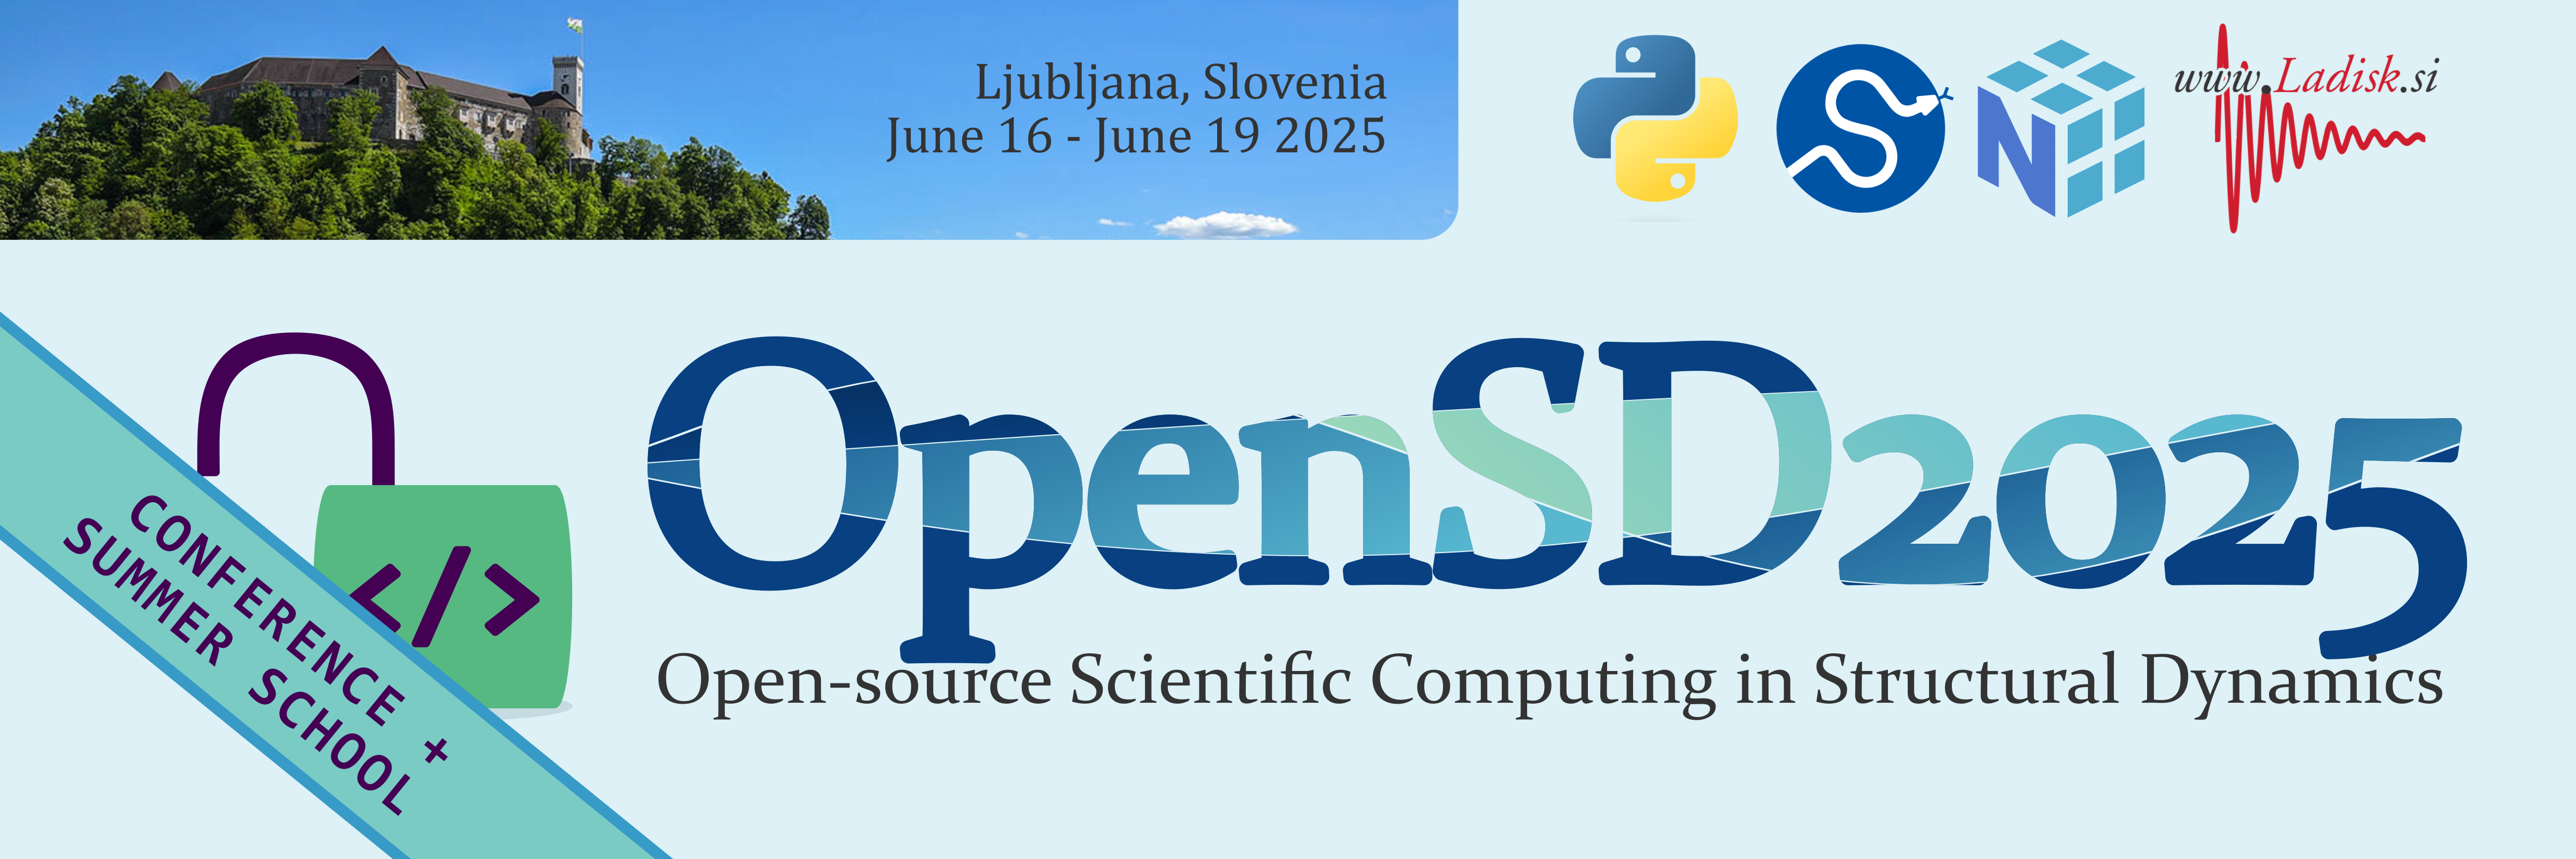

# What is the problem?

* How can we work together?
* Easy re-use of the code?
* Easy extension of the code?
* Long term sustainability?
* Why open-source? Which programming language?

---

## Which Programming language?

6 reasons as seen by [Kayla Matthews](https://www.kdnuggets.com/2017/07/6-reasons-python-suddenly-super-popular.html):
1. Python Has a Healthy, Active and Supportive Community
2. Python Has Some Great Corporate Sponsors
3. Python Has Big Data
4. Python Has Amazing Libraries (600k packages: pypi.org/)
5. Python Is Reliable and Efficient
6. Python Is Accessible

**Open-source, governed by [The Python Software Foundation](https://www.python.org/psf-landing/)**: since 2001 free, FREE.

**How does Structural Dynamics fit in Python?**

<img width=800 src="./figures/py_ecosys3.png">

# Seven Stages of Open Software ([Matthew Rocklin](https://coiled.io/blog/stages-of-openness.html))

1. **Publicly visible source code**: We uploaded our code to GitHub

2. **Licensed for reuse**: And let people use it for free

3. **Accepting contributions**: And if they submit a patch, we’ll take the time to look at it, and work with them to merge it in

4. **Open development**: And when we work we’ll make sure that all of our communication happens in the open as well, so that others can see what we’re doing and why

5. **Open decision making**: And that communication will be open to the public, so that everyone can weigh in, vote, and determine what happens to the project

6. **Multi-institution engagement**: So much so that no single institution or individual has control over the project

7. **Retirement**: So now we can retire, and know that the software will live on forever

# The idea of SDyPy

-   SDyPy aims to **defragment** existing open source efforts.
-   Provides a curated, flexible software toolset.
-   Implements **commonly used algorithms** in structural dynamics.
-   Acts as an **integrator** of established libraries.
-   **Accelerates** development and implementation of new scientific methods.
-   [SDyPy Organization: github.com/sdypy](https://github.com/sdypy)

## SDyPy Enhancement Proposals - SEPs

- Enhancement proposals are **guidelines** for project development.
- SEPs are openly debated.

Existing [SEPs](https://github.com/sdypy/sdypy/tree/main/docs/seps):
- **SEP 0** (how to write a SEP)
- **SEP 1** (levels of integration)
- **SEP 2** (nomenclature guidelines)
- **SEP 3** (namespace packages)
- **SEP 4** (roadmap)

# SEP 4 - Roadmap

## The long-term functionalities:

* ``sdypy.EMA``: Experimental Modal Analysis
* ``sdypy.io``: Input/Output methods
* ``sdypy.FRF``: Frequency Response Function computation
* ``sdypy.excitation``: Excitation signal generation
* ``sdypy.model``: System modeling (FEM,...)
* ``sdypy.view``: Visualisation of data (models, time/frequency domain)

---

* ``sdypy.control``: Control of dynamic systems
* ``sdypy.system``: System identification methods
* ``sdypy.OMA``: Operational Modal Analysis
* ``sdypy.reduction``: Model reduction and coupling
* ``sdypy.fatigue``: Vibration fatigue in frequency-domain
* ``sdypy.holography``: Methods to identify vibrational response using acoustic holography
* ``sdypy.image``: Methods to identify vibrational response from image data


## `sdypy.io` - Input/Output methods

- `sdypy.io.uff` - Universal File Format read and write
- `sdypy.io.mraw` - Photron MRAW File Reader
- `sdypy.io.lvm` - LabView Measurement File Reader

In [4]:
data = sd.io.lvm.read(filename="data/long.lvm")

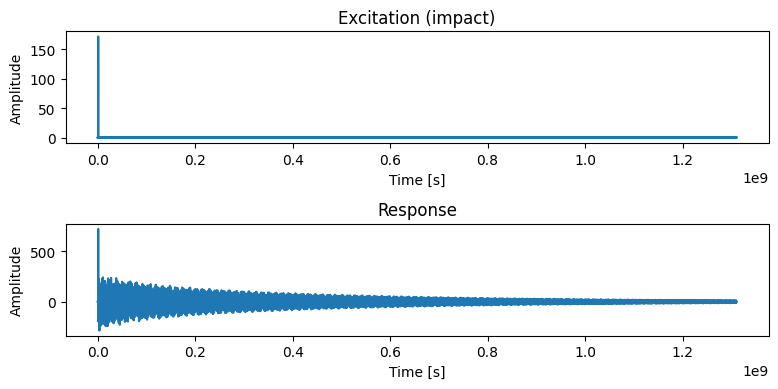

In [5]:
fs = data[0]['Delta_X'][0]

time_vec = np.arange(data[0]['data'].shape[0]) / fs

fig, axs = plt.subplots(2, 1, figsize=(8, 4))

axs[0].plot(time_vec, data[0]["data"][:, 0])
axs[0].set_title('Excitation (impact)')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Amplitude')

axs[1].plot(time_vec, data[0]["data"][:, 1])
axs[1].set_title('Response')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

## `sdypy.FRF` - Frequency Response Function computation

- Handles MIMO, SIMO, SISO
- Applies windows
- Handles FRF forms (accelerance, mobility, receptance)
- Handles response delay

In [6]:
fs = int(1 / data[0]["Delta_X"][0])

frf_object = sd.FRF.FRF(fs, data[0]["data"][:, 0], data[0]["data"][:, 1])

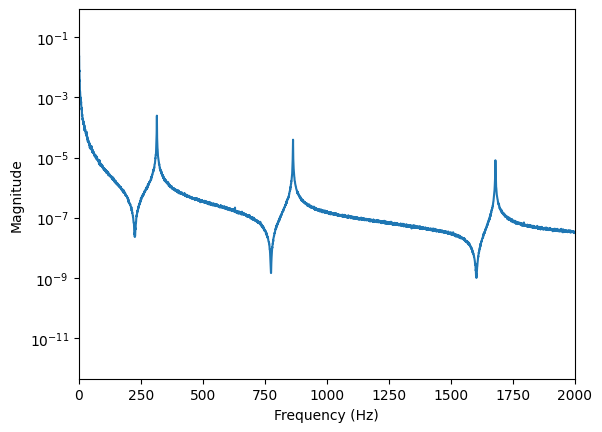

In [7]:
plt.figure()
plt.semilogy(frf_object.get_f_axis(), np.abs(frf_object.get_FRF()[0, 0]))
plt.xlim(0, 2000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude');

## `SDyPy.EMA`

In [8]:
ema_obj = sd.EMA.Model(frf, freq, upper=5000, pol_order_high=50)

In [9]:
ema_obj.get_poles()

100%|██████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 197.48it/s]


In [10]:
ema_obj.select_poles()

100%|██████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 184.56it/s]


<Figure size 640x480 with 0 Axes>

In [11]:
ema_obj.print_modal_data()

   Nat. f.      Damping
-----------------------
1)  177.1	0.0088
2)  477.4	0.0019
3)  933.0	0.0014
4) 1535.4	0.0019
5) 2286.8	0.0028
6) 3161.5	0.0023
7) 4181.3	0.0015


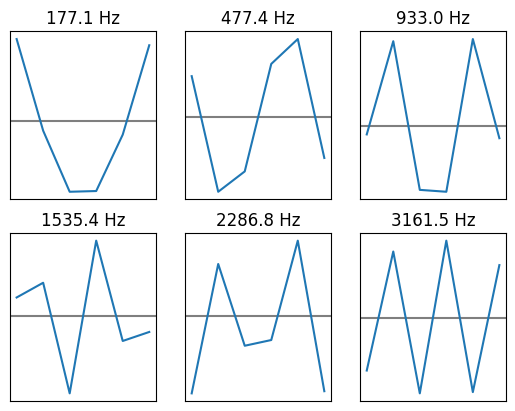

In [12]:
fig, axs = plt.subplots(2, 3)
for i, ax in enumerate(axs.flatten()):
    ax.axhline(0, color='k', alpha=0.5)
    ax.plot(ema_obj.A.imag[:, i])
    ax.set_yticks([]); ax.set_xticks([])
    ax.set_title(f'{ema_obj.nat_freq[i]:.1f} Hz')

## What we're working on now?

The following codes will not work as the `sdypy-view` and `sdypy-model` are not published yet. We will publish them shortly!

### `sdypy.model` - System modeling

- Tetrahedrons
- Euler-Bernoulli beam
- Shell

```python
# Get mesh
mesh = meshio.read("data/L_bracket.msh")
nodes = mesh.points / 1000
elements = []
for cells in mesh.cells:
    if cells.type == "quad":
        elements.append(cells.data)
elements = np.vstack(elements)

#  Properties
thickness = 0.001
E = 2.069e11
nu = 0.3
rho = 7829
```

```python
from sdypy.model import Shell

shell_obj = Shell(nodes, elements, E, nu, rho, thickness)
K = shell_obj.K
M = shell_obj.M
```

```python
from scipy.sparse.linalg import eigsh
eigenvalues, eigenvectors = eigsh(K, M=M, k=20, sigma=0, which='LM')
```

```python
nf = np.sqrt(eigenvalues) / (2 * np.pi)
for i in range(10):
    print(f"Mode {i+1}: {nf[i]:.2f} Hz")
```

### `sdypy.view` - Visualisation of data

```python
# Select an eigenvector (e.g., the first one)
eigenvector = eigenvectors[:, 9]

# Extract translational components (ux, uy, uz) from modal shape
num_nodes = nodes.shape[0]
modal_shape = np.zeros_like(nodes)

for i in range(num_nodes):
    modal_shape[i, 0] = eigenvector[i * 6]     # ux
    modal_shape[i, 1] = eigenvector[i * 6 + 1] # uy
    modal_shape[i, 2] = eigenvector[i * 6 + 2] # uz

# Scale the modal shape for better visualization
scale_factor = np.linalg.norm(nodes)/np.linalg.norm(modal_shape) / 10
modal_shape *= scale_factor
```

```python
from sdypy.view import Plotter3D

plotter = Plotter3D()
plotter.add_fem_mesh(nodes, elements, animate=modal_shape, field="norm")
plotter.show(show_grid=True, show_axes=True)
```

# Conclusions

* We value the **Seven Stages of Open Software** as discussed by [Matthew Rocklin](https://coiled.io/blog/stages-of-openness.html)
* Check-out 
   https://github.com/sdypy/sdypy 
   which is an effort to prepare an open, inclusive, and multi-institution governed github organization in the field of Structural Dynamics.
* We welcome everybody to openly collaborate.
* Get in touch with us (via email or on github).

<img src='figures/OpenSD2025_banner.png' style="width:80%">

Key deadlines: 

* Feb 20th 2025: deadline for submission of abstracts.
* Apr 15th 2025: deadline for extended abstract or full paper submission.
* Apr 15th 2025: early-bird registration closed.
* May 25th 2025: registration closed.
* June 16th 2025: conference start.
* June 18th 2025: summer school start.